In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [42]:
base_consumos = pd.read_excel(r"C:/Users/JORGE CONTRERAS/ARCHIVO_INFORMES/CONSUMOS.xlsx")
base_items = pd.read_excel(r"C:/Users/JORGE CONTRERAS/ARCHIVO_INFORMES/ITEMS_INVENTARIO.xlsx")
base_inventarios = pd.read_excel(r"C:/Users/JORGE CONTRERAS/ARCHIVO_INFORMES/INVENTARIOS.xlsx")

In [30]:
base_consumos_2023= base_consumos[base_consumos['Año']==2023]
base_consumos_2024= base_consumos[base_consumos['Año']==2024].copy()

mes_orden = {
    'ene': 1, 'feb': 2, 'mar': 3, 'abr': 4, 'may': 5,
    'jun': 6, 'jul': 7, 'ago': 8, 'sep': 9, 'oct': 10,
    'nov': 11, 'dic': 12
}

base_consumos_2024['Mes_orden'] = base_consumos_2024['Mes'].map(mes_orden)
base_consumos_2024 = base_consumos_2024.sort_values('Mes_orden').drop(columns='Mes_orden')
base_consumos_2024


,Año,Mes,Orden interno,Referencia,Fecha,Documento,Desc. item,Bodega,Lote,Ubicación,Entradas (inv.),Salidas (inv.)
91294,2024,ene,1,2733,1/3/2024,PTM-00050213,PLATINA ESQUINERA ALUM 3/16*1,MP002,,,6.0,0.00
91295,2024,ene,1,7299,1/3/2024,PTM-00050214,GANCHO CORBELLA,MP002,,,6.0,0.00
91296,2024,ene,1,501,1/3/2024,CPM-00035177,PERFIL ESSO 07 CRUDO CL1013,MP002,,,0.0,32.78
91221,2024,ene,1,1010103,1/3/2024,CPM-00035170,TAPA PLASTICA OREJA BANETA TOSCANY,MP002,,,0.0,2.00
91222,2024,ene,1,4954,1/3/2024,CPM-00035170,PRISIONERO ALLEN 3/16 X 1/4 RO,MP002,,,0.0,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...
150437,2024,dic,12,26372 ...,2024-12-24 00:00:00,SCI-00001775,MASCARILLA FILTRANTE NGR. FFP1 FIB. 30UN,MP001,,,0.0,3.00
150452,2024,dic,12,28372 ...,2024-12-23 00:00:00,SCI-00002416,PANTONE 492 C,MP002,,,0.0,0.50
150451,2024,dic,12,28127 ...,2024-12-20 00:00:00,CPM-00038172,ADAPTADOR DL163,MP002,,,0.0,1.00
150450,2024,dic,12,28127 ...,2024-12-26 00:00:00,CPM-00038180,ADAPTADOR DL163,MP002,,,0.0,1.00


In [48]:


base_final_2024=base_consumos_2024.groupby(['Referencia','Desc. item','Bodega']).agg(
    consumo_minimo=('Salidas (inv.)','min'),
    consumo_maximo=('Salidas (inv.)','max'),
    consumo_promedio=('Salidas (inv.)','mean'),
    Desviacion_standar=('Salidas (inv.)','std'),
    consumo_total = ('Salidas (inv.)','sum')
    
).reset_index()

inventario_dict =base_inventarios.set_index('Referencia')['Cant. disponible'].to_dict()

base_final_2024['Inventario'] = base_final_2024['Referencia'].map(inventario_dict)



base_final_2024['consumo_diario']=base_final_2024['consumo_total']/300

base_final_2024['stock_seguridad'] = (1.65)*base_final_2024['Desviacion_standar']*np.sqrt(12)



print(base_final_2024)

base_final_2024.to_excel(r"C:/Users/JORGE CONTRERAS/ARCHIVO_INFORMES/MAXIMOS_MINIMOS.xlsx",sheet_name='CONSUMOS_2024',index=False)



          Referencia                               Desc. item Bodega  \
0                  3                 CARTON SINGLE FACE KILOS  MP001   
1                  3                 CARTON SINGLE FACE KILOS  MP002   
2                  8  CINTA EMPAQUE IMPRESA 48 mm *100 MTS C7  MP001   
3                  8  CINTA EMPAQUE IMPRESA 48 mm *100 MTS C7  MP002   
4                  9  CINTA EMPAQUE  2 * 100 M TOLDOS TOSCANI  MP002   
...              ...                                      ...    ...   
5173  VIGAAC05 ESP01         VIGA EN ACERO 250x100 CAL 5mm 8M  MP002   
5174  VIGAAC05 ESP02       VIGA EN ACERO 250x100 CAL 5mm 5.7M  MP002   
5175        VIGAAL02                 VIGA EN ALUMINIO 101X101  MP002   
5176          VSINTE                INTERESES DE MORA CON IVA  MP001   
5177          VSINTM                        INTERESES DE MORA  MP002   

      consumo_minimo  consumo_maximo  consumo_promedio  Desviacion_standar  \
0              31.73            45.0         42.643913   

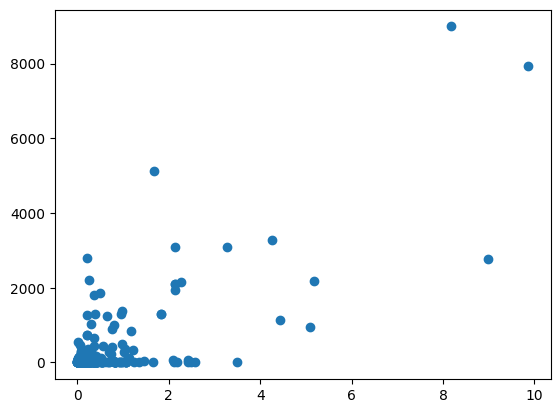

In [51]:
plt.plot(base_final_2024['consumo_diario'],base_final_2024['Inventario'],'o')